In [135]:
import pandas as pd
import numpy as np
from random import randrange
from pandas import Series
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.api import AutoReg
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings('ignore')

In [136]:
df = pd.read_csv('../../dataset/Microsoft_Stock.csv')
df

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...,...
1506,3/25/2021 16:00:00,235.30,236.94,231.57,232.34,34061853
1507,3/26/2021 16:00:00,231.55,236.71,231.55,236.48,25479853
1508,3/29/2021 16:00:00,236.59,236.80,231.88,235.24,25227455
1509,3/30/2021 16:00:00,233.53,233.85,231.10,231.85,24792012


In [137]:
# Make sure your "Date" column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])
 
# Sorting the data by date (if not sorted)
df = df.sort_values(by='Date')
 
# Resetting the index
df.set_index('Date', inplace=True)


<Figure size 2000x2000 with 0 Axes>

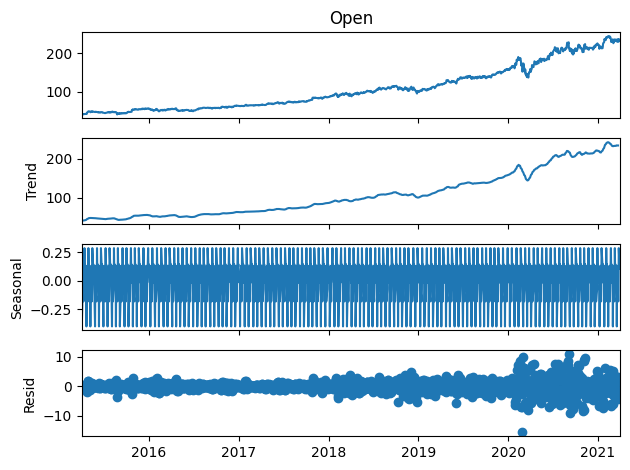

In [138]:
result = seasonal_decompose(df['Open'], model='additive', period=12)
plt.figure(figsize=(20, 20), dpi=100)

result.plot()
plt.show()

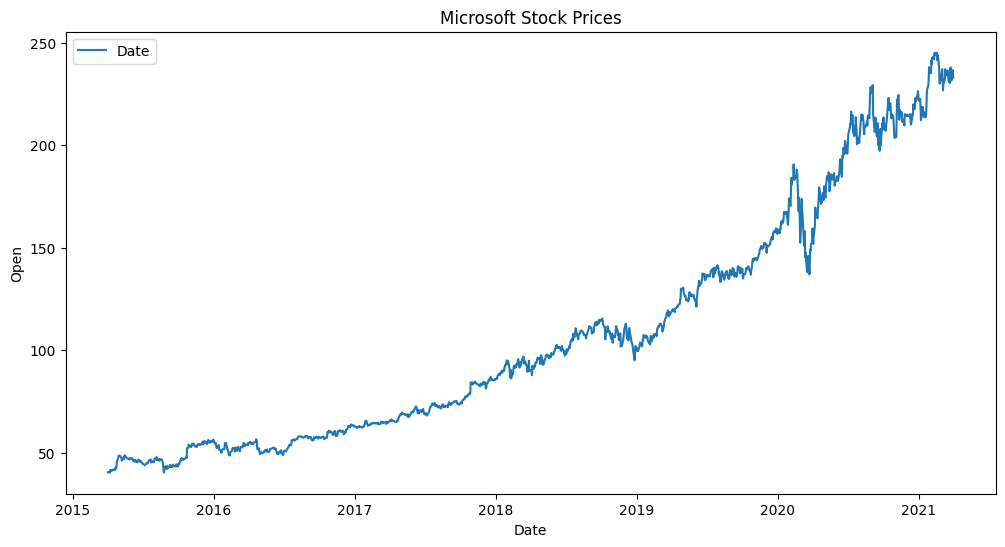

In [139]:
# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot( df['Open'], label='Date')
plt.xlabel('Date')
plt.ylabel('Open')
plt.legend()
plt.title('Microsoft Stock Prices')
plt.show()

In [140]:
# Adding lag features to the DataFrame
for i in range(1, 13): # Creating lag features up to 5 days
	df[f'Lag_{i}'] = df['Open'].shift(i)

df

,Open,High,Low,Close,Volume,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7,Lag_8,Lag_9,Lag_10,Lag_11,Lag_12
Date,,,,,,,,,,,,,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476,40.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692,40.66,40.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375,40.34,40.66,40.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438,41.61,40.34,40.66,40.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-25 16:00:00,235.30,236.94,231.57,232.34,34061853,237.85,237.49,230.27,231.02,232.56,236.15,236.28,234.96,234.01,234.96,237.00,232.88
2021-03-26 16:00:00,231.55,236.71,231.55,236.48,25479853,235.30,237.85,237.49,230.27,231.02,232.56,236.15,236.28,234.96,234.01,234.96,237.00
2021-03-29 16:00:00,236.59,236.80,231.88,235.24,25227455,231.55,235.30,237.85,237.49,230.27,231.02,232.56,236.15,236.28,234.96,234.01,234.96


In [141]:
# Drop rows with NaN values resulting from creating lag features
df.dropna(inplace=True)

# Split the data into training and testing sets
train_size = int(0.8 * len(df))
train_data = df[:train_size]
test_data = df[train_size:]

# Define the input features (lag features) and target variable

y_train = train_data['Open']

y_test = test_data['Open']


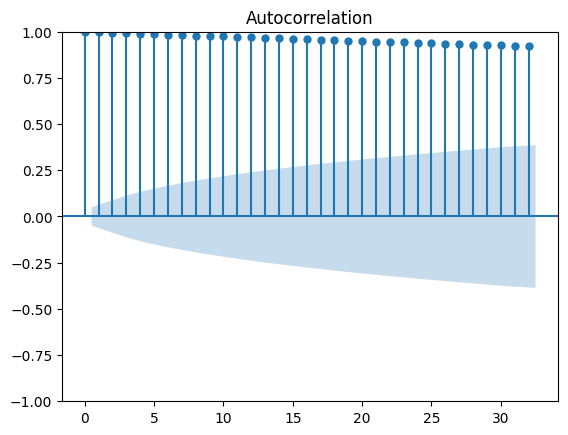

In [142]:
from statsmodels.graphics.tsaplots import plot_acf
series = df['Open']
plot_acf(series)
plt.show()

In [143]:
for i in range(1, 20):
    print(f'Autocorrelatio lag{i} : {df['Open'].corr(df['Open'].shift(i))}')

Autocorrelatio lag1 : 0.9992709343797572
Autocorrelatio lag2 : 0.9986368585327103
Autocorrelatio lag3 : 0.9981644500121788
Autocorrelatio lag4 : 0.9976830497914186
Autocorrelatio lag5 : 0.9971502322647191
Autocorrelatio lag6 : 0.9966475782654713
Autocorrelatio lag7 : 0.9961972650991003
Autocorrelatio lag8 : 0.9957946603828426
Autocorrelatio lag9 : 0.9953212306460872
Autocorrelatio lag10 : 0.994799004846223
Autocorrelatio lag11 : 0.9942912173366958
Autocorrelatio lag12 : 0.993895884568647
Autocorrelatio lag13 : 0.9935022831341448
Autocorrelatio lag14 : 0.9930659082533106
Autocorrelatio lag15 : 0.992729728676349
Autocorrelatio lag16 : 0.9924066925559388
Autocorrelatio lag17 : 0.9920872371202312
Autocorrelatio lag18 : 0.991724861275272
Autocorrelatio lag19 : 0.9913677334255263


In [144]:
# Create and train the autoregressive model
lag_order = 12 # Adjust this based on the ACF plot
ar_model = AutoReg(y_train, lags=lag_order)
ar_results = ar_model.fit()

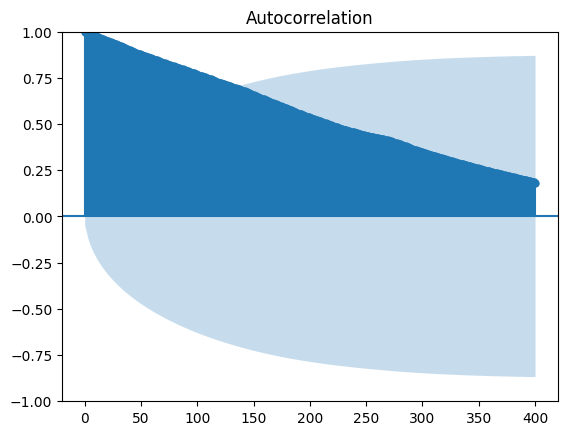

In [145]:
from statsmodels.graphics.tsaplots import plot_acf
series = df['Close']
plot_acf(series, lags=400)
plt.show()

In [146]:
# Make predictions on the test set
y_pred = ar_results.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)
#print(y_pred)

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R Squared value: {r2:.2f}')

Mean Absolute Error: 13.66
Root Mean Squared Error: 16.70
R Squared value: 0.57


In [147]:
# Create and train the autoregressive model
lag_order = 131 # Adjust this based on the ACF plot
ar_model = AutoReg(y_train, lags=lag_order)
ar_results = ar_model.fit()


In [148]:
y_train

Date
2015-04-20 16:00:00     41.73
2015-04-21 16:00:00     43.00
2015-04-22 16:00:00     42.67
2015-04-23 16:00:00     42.85
2015-04-24 16:00:00     45.66
                        ...  
2020-01-15 16:00:00    162.62
2020-01-16 16:00:00    164.35
2020-01-17 16:00:00    167.42
2020-01-21 16:00:00    166.68
2020-01-22 16:00:00    167.40
Name: Open, Length: 1199, dtype: float64

In [149]:
y_test

Date
2020-01-23 16:00:00    166.19
2020-01-24 16:00:00    167.51
2020-01-27 16:00:00    161.15
2020-01-28 16:00:00    163.78
2020-01-29 16:00:00    167.84
                        ...  
2021-03-25 16:00:00    235.30
2021-03-26 16:00:00    231.55
2021-03-29 16:00:00    236.59
2021-03-30 16:00:00    233.53
2021-03-31 16:00:00    232.91
Name: Open, Length: 300, dtype: float64

In [150]:
# Make predictions on the test set
#y_pred = ar_results.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)
y_pred = ar_results.forecast(len(y_test))

#print(y_pred)

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R Squared value: {r2:.2f}')



Mean Absolute Error: 10.94
Root Mean Squared Error: 13.68
R Squared value: 0.71


In [151]:
y_pred


1199    166.252307
1200    167.325124
1201    166.968718
1202    168.469769
1203    169.158923
           ...    
1494    251.535619
1495    251.871422
1496    252.305858
1497    252.584836
1498    253.014191
Length: 300, dtype: float64

Text(0, 0.5, 'Close')

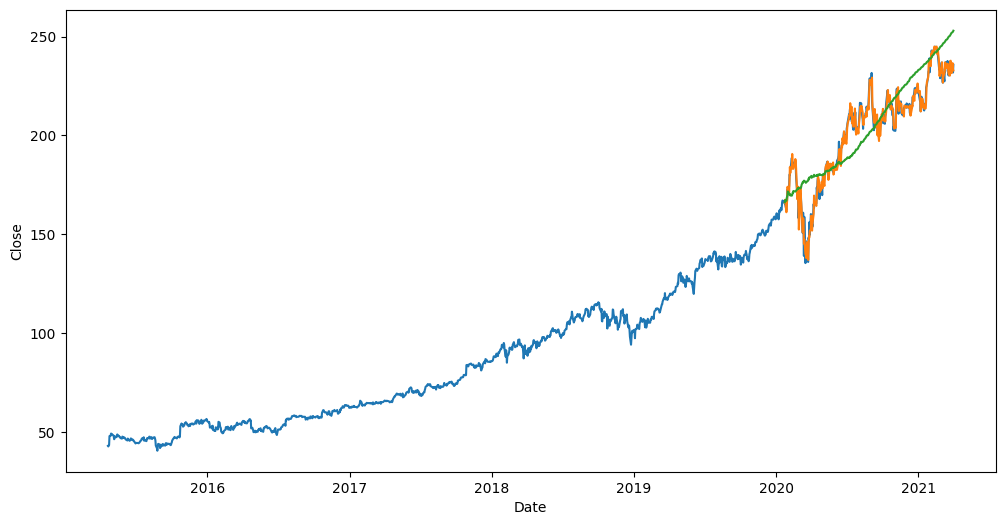

In [152]:
# plot y_test and y_pred
plt.figure(figsize=(12, 6))
plt.plot( df['Close'], label='Close Microsoft')
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close')

In [153]:
reliance = pd.read_csv(r"../../dataset/Microsoft_Stock.csv", index_col='Date',
                       parse_dates=True)
 
# Printing dataFrame
reliance.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438


In [154]:
# Extract 'Close' column and convert to DataFrame
reliance = reliance['Close'].to_frame()
 
# Calculate 30-day Simple Moving Average (SMA)
reliance['SMA20'] = reliance['Close'].rolling(20).mean()
 
# Remove NULL values
reliance.dropna(inplace=True)
 
# Print DataFrame
reliance

,Close,SMA20
Date,,
2015-04-29 16:00:00,49.06,43.2080
2015-04-30 16:00:00,48.64,43.6040
2015-05-01 16:00:00,48.66,44.0225
2015-05-04 16:00:00,48.24,44.3570
2015-05-05 16:00:00,47.60,44.6605
...,...,...
2021-03-25 16:00:00,232.34,233.3775
2021-03-26 16:00:00,236.48,233.5825
2021-03-29 16:00:00,235.24,233.4975


<Axes: xlabel='Date'>

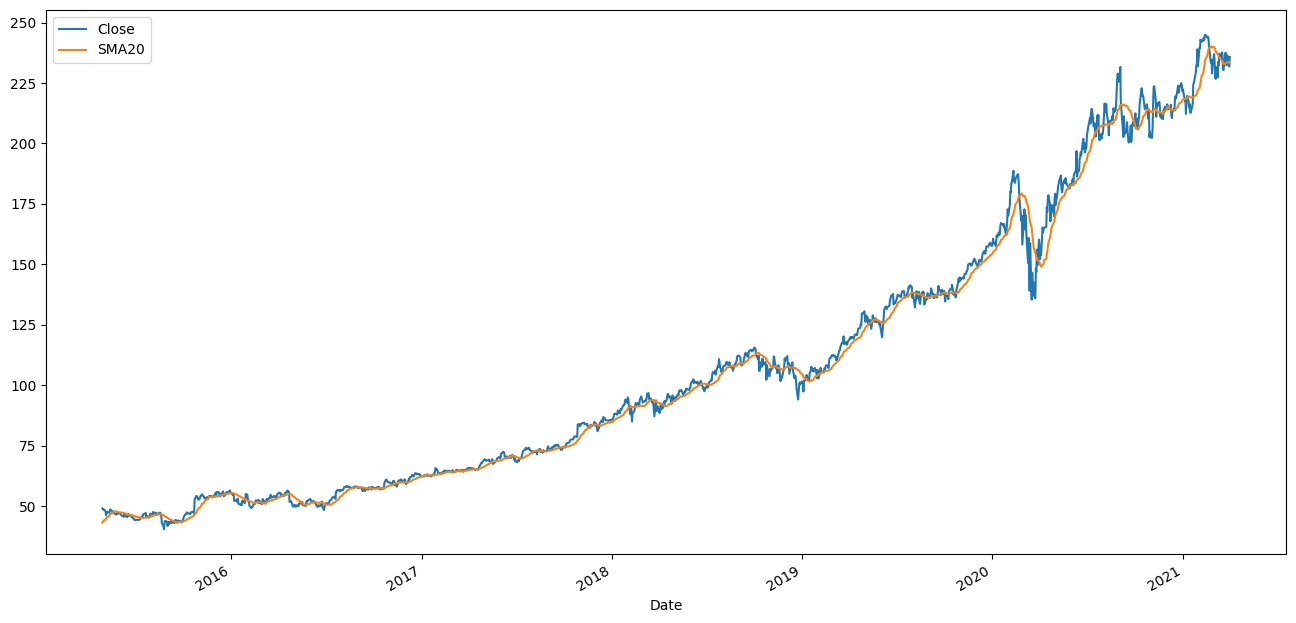

In [155]:
reliance[['Close', 'SMA20']].plot(label='RELIANCE', 
                                  figsize=(16, 8))

ADF Statistic: 1.7371362899270961
p-value: 0.9982158366942122
ADF Statistic: -10.038331065146417
p-value: 1.5195939917530296e-17


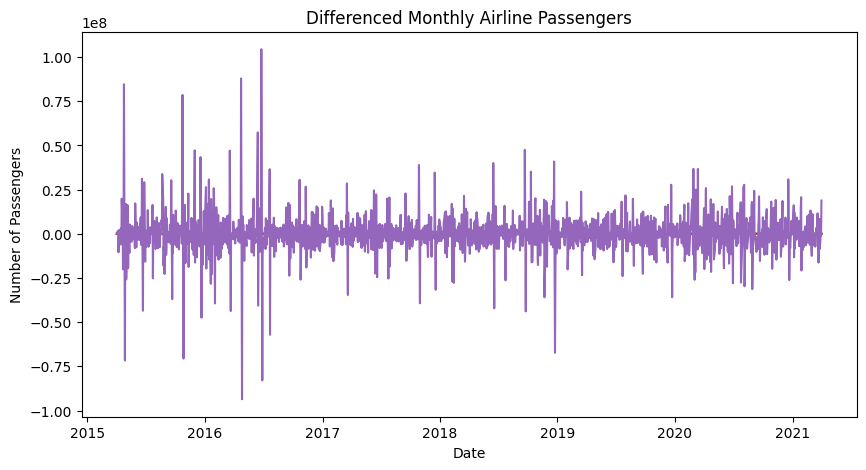

In [156]:
from statsmodels.tsa.stattools import adfuller

MSFT_data = pd.read_csv(r"../../dataset/Microsoft_Stock.csv", index_col='Date',
                       parse_dates=True)

# Check for stationarity
result = adfuller(MSFT_data['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Since the p-value is > 0.05, the data is not stationary. We need to difference it.
MSFT_data_diff = MSFT_data.diff().dropna()

# Check for stationarity again
result = adfuller(MSFT_data_diff['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Plot the differenced data
plt.figure(figsize=(10, 5))
plt.plot(MSFT_data_diff)
plt.title('Differenced Monthly Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()

In [157]:
# Fit the ARMA(1, 1) model
model = ARIMA(MSFT_data['Close'], order=(1, 1, 1))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1511
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3381.104
Date:                Tue, 30 Jul 2024   AIC                           6768.207
Time:                        14:45:33   BIC                           6784.167
Sample:                             0   HQIC                          6774.151
                               - 1511                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2885      0.037     -7.781      0.000      -0.361      -0.216
ma.L1          0.0189      0.040      0.476      0.634      -0.059       0.097
sigma2         5.1570      0.075     68.924      0.0

In [158]:
# Fit the ARIMA(1, 1, 0) model
model = ARIMA(y_train, order=(12, 2, 14))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                 1199
Model:               ARIMA(12, 2, 14)   Log Likelihood               -1896.372
Date:                Tue, 30 Jul 2024   AIC                           3846.745
Time:                        14:45:40   BIC                           3984.109
Sample:                             0   HQIC                          3898.495
                               - 1199                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2856      1.935     -0.664      0.507      -5.079       2.508
ar.L2         -0.9547      1.968     -0.485      0.628      -4.811       2.902
ar.L3         -0.4640      1.404     -0.331      0.7

In [159]:
# Make predictions on the test set
y_pred = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)
#print(y_pred)

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R Squared Error: {r2:.2f}')



Mean Absolute Error: 10.92
Root Mean Squared Error: 13.64
R Squared Error: 0.71


<Figure size 2000x2000 with 0 Axes>

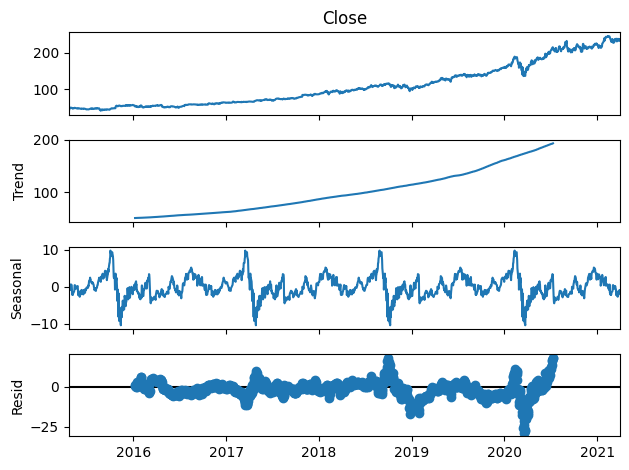

In [160]:
result = seasonal_decompose(df['Close'], model='additive', period=365)
plt.figure(figsize=(20, 20), dpi=100)

result.plot()
plt.show()